In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import scale

In [3]:
df_breast = pd.read_csv("data/cancer.csv",engine = "python")

In [4]:
df_breast.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df_breast.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [6]:
df_breast.corr().round(3)

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
diagnosis,1.000,-0.730,-0.415,-0.743,-0.709,-0.359,-0.597,-0.696,-0.777,-0.330,...,-0.776,-0.457,-0.783,-0.734,-0.421,-0.591,-0.660,-0.794,-0.416,-0.324
mean radius,-0.730,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,...,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
mean texture,-0.415,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,...,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
mean perimeter,-0.743,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,...,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
mean area,-0.709,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,...,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
mean smoothness,-0.359,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,...,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
mean compactness,-0.597,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,...,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
mean concavity,-0.696,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,...,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
mean concave points,-0.777,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,...,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
mean symmetry,-0.330,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,...,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438


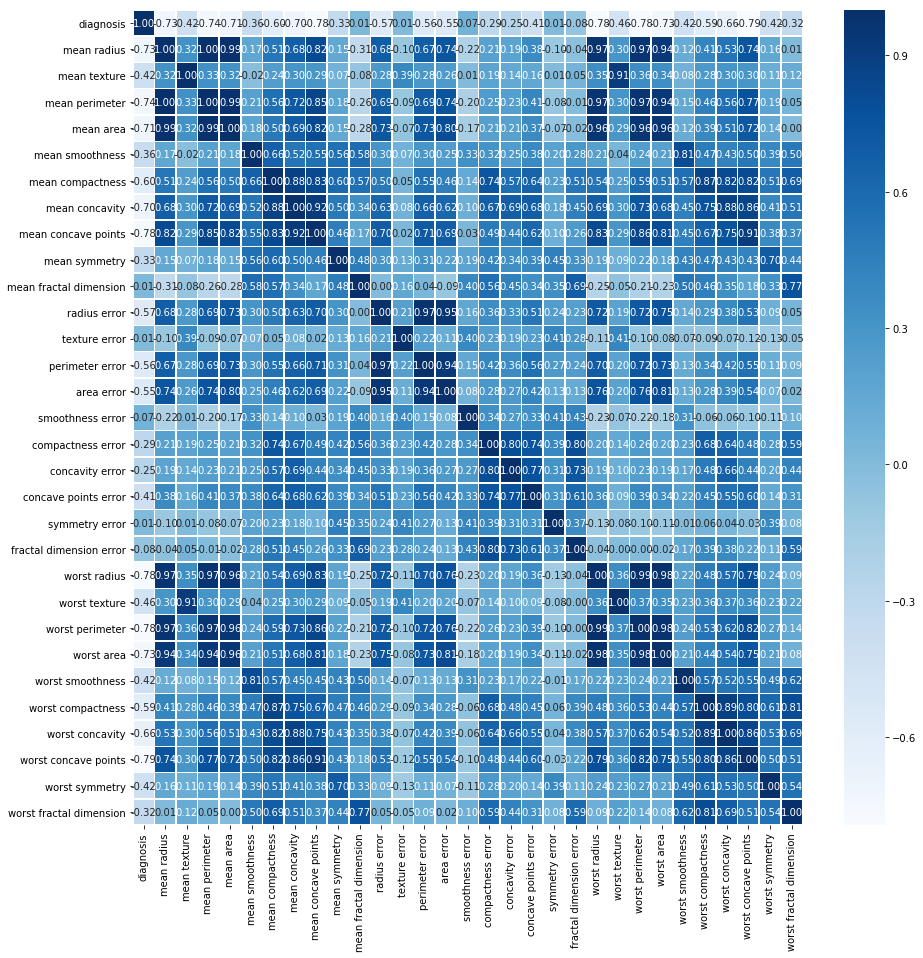

In [7]:
plt.figure(figsize= (15,15))
sns.heatmap(df_breast.corr(),annot= True, fmt = ".2f",linewidths =.5,cmap ='Blues' )

<h4>상관관계가 높은 변수들을 표준화하고 scatter plot을 보면 거의 유사한 분포를 가진다.<h4>

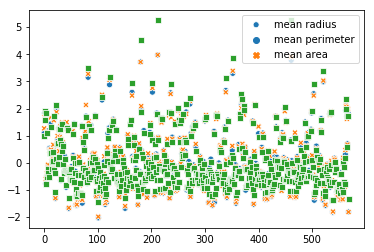

In [8]:
sns.scatterplot(data = scale(df_breast[["mean radius","mean perimeter","mean area"]]))
plt.legend(["mean radius","mean perimeter","mean area"])

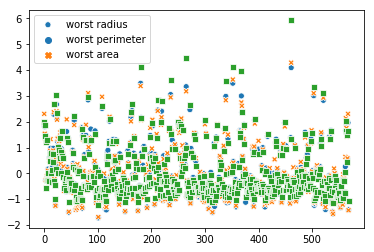

In [9]:
sns.scatterplot(data = scale(df_breast[["worst radius","worst perimeter","worst area"]]))
plt.legend(["worst radius","worst perimeter","worst area"])

<h2>histogram으로 양성,음성 판단<h2>

In [10]:
def hist_map(feature):
    grid = sns.FacetGrid(df_breast, col = "diagnosis")
    grid.map(plt.hist,feature)

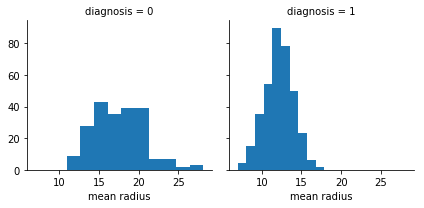

In [11]:
# mean radius 가 작을수록 유방암 양성의 확률이 높다
hist_map("mean radius")

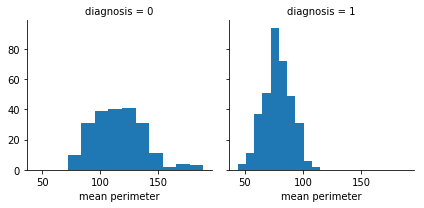

In [12]:
# mean perimeter가 작을수록 유방암 양성의 확률이 높다.
hist_map("mean perimeter")

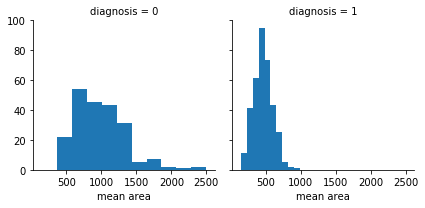

In [13]:
# mean area가 작을수록 유방암 양성의 확률이 높다.
hist_map("mean area")

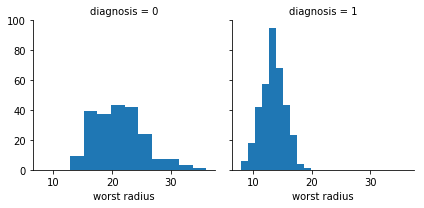

In [14]:
# worst radius 가 작을수록 유방암 양성의 확률이 높다
hist_map("worst radius")

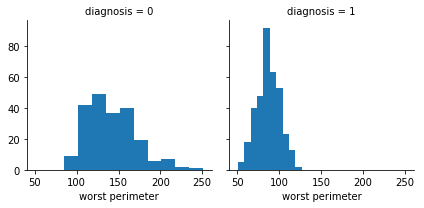

In [15]:
# worst perimeter 가 작을수록 유방암 양성의 확률이 높다
hist_map("worst perimeter")

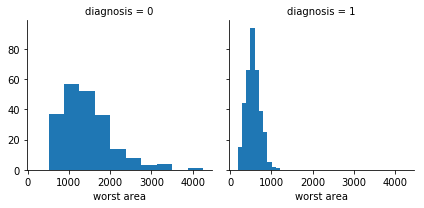

In [16]:
# worst area 가 작을수록 유방암 양성의 확률이 높다
hist_map("worst area")

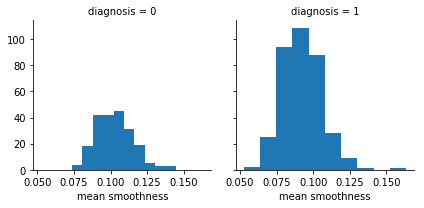

In [17]:
# 매끄러움의 평균은 암의 악성 양성의 판단의 기준으로는 힘들다
# 단, 양성의 경우의 분포가 더 많이 나타난다.
hist_map("mean smoothness")

In [52]:
df_breast.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [55]:
df_breast[['diagnosis','mean radius']]

,diagnosis,mean radius
0,0,17.990
1,0,20.570
2,0,19.690
3,0,11.420
4,0,20.290
5,0,12.450
6,0,18.250
7,0,13.710
8,0,13.000
9,0,12.460


In [72]:
df_breast.groupby('diagnosis')['mean radius'].size()

diagnosis
0    212
1    357
Name: mean radius, dtype: int64

In [65]:
df1 = df_breast[['diagnosis']]
df2 = df_breast[['mean radius']]
df3 = pd.merge(df1,df2,how = 'outer', left_index= True,right_index= True)
df3

,diagnosis,mean radius
0,0,17.990
1,0,20.570
2,0,19.690
3,0,11.420
4,0,20.290
5,0,12.450
6,0,18.250
7,0,13.710
8,0,13.000
9,0,12.460
